<a href="https://colab.research.google.com/github/muhammadahmed73/Final-Project/blob/main/UOH_Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final Project/Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [ ]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

# Preprocessing



```
# This is formatted as code
```

Getting data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [ ]:
df.dtypes

,0
Transaction ID,object
Country,object
Amount (USD),float64
Transaction Type,object
Date of Transaction,object
Person Involved,object
Industry,object
Destination Country,object
Reported by Authority,bool
Source of Money,object




Changing the datatype to suitable formats

In [ ]:
columns_to_convert = ['Transaction ID', 'Country', 'Transaction Type', 'Person Involved', 'Industry',
                      'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country']
df[columns_to_convert] = df[columns_to_convert].astype('string')

Making a date type of the datee format which currently exists in object format

In [ ]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

In [ ]:
df["Amount (USD)"] = df["Amount (USD)"].astype('float')

In [ ]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


Updated dataframe types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  string        
 1   Country                      10000 non-null  string        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  string        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  string        
 6   Industry                     10000 non-null  string        
 7   Destination Country          10000 non-null  string        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  string        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

Checking null values

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Country,0
Amount (USD),0
Transaction Type,0
Date of Transaction,0
Person Involved,0
Industry,0
Destination Country,0
Reported by Authority,0
Source of Money,0


There are currently no null values in our dataset

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random


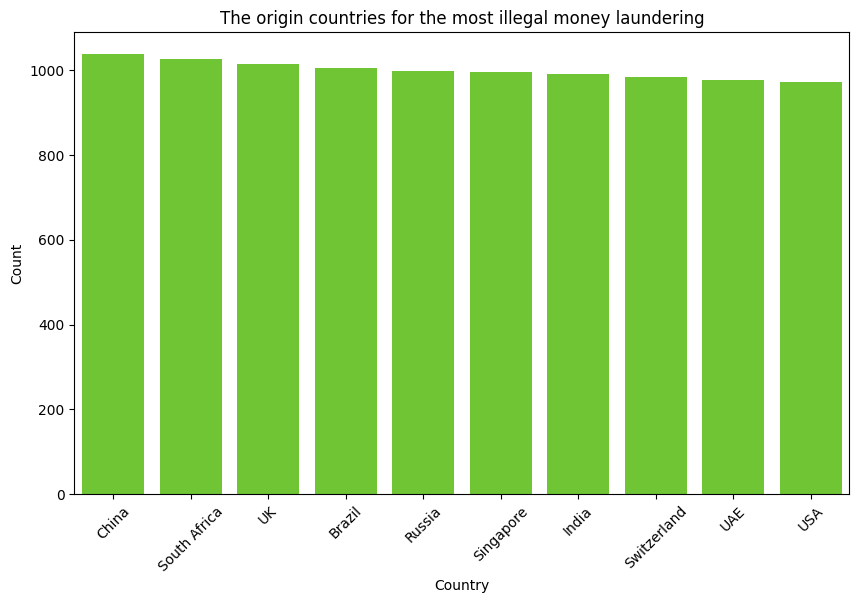

In [ ]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The origin countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

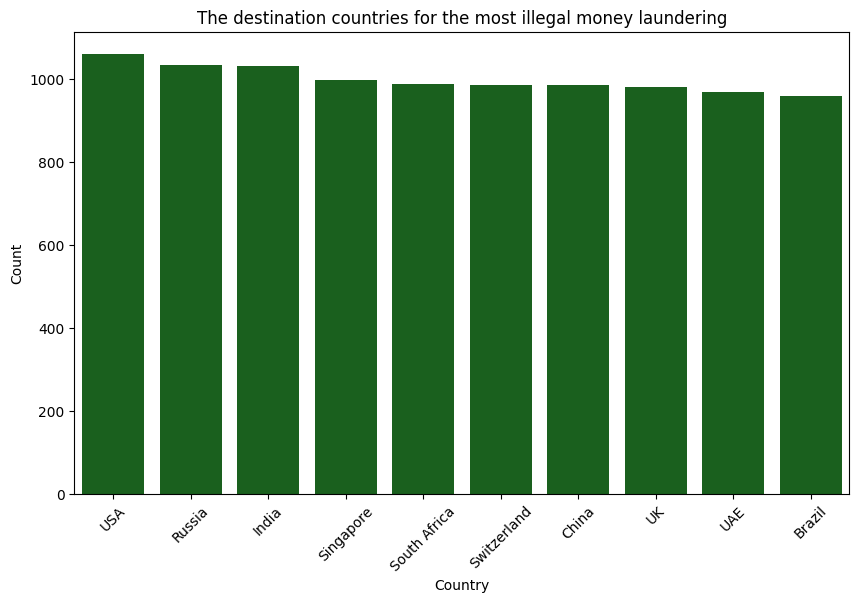

In [ ]:
country_counts = df['Destination Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The destination countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

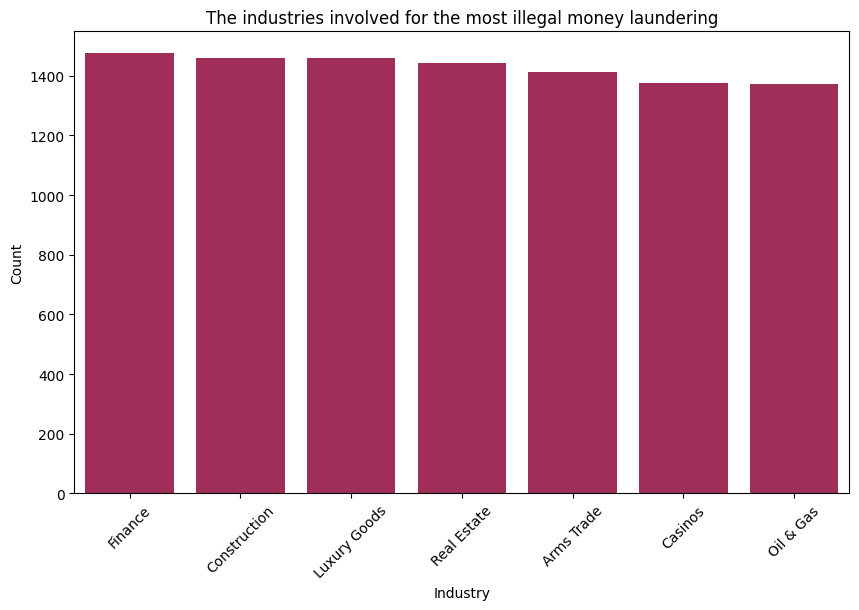

In [ ]:
country_counts = df['Industry'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The industries involved for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

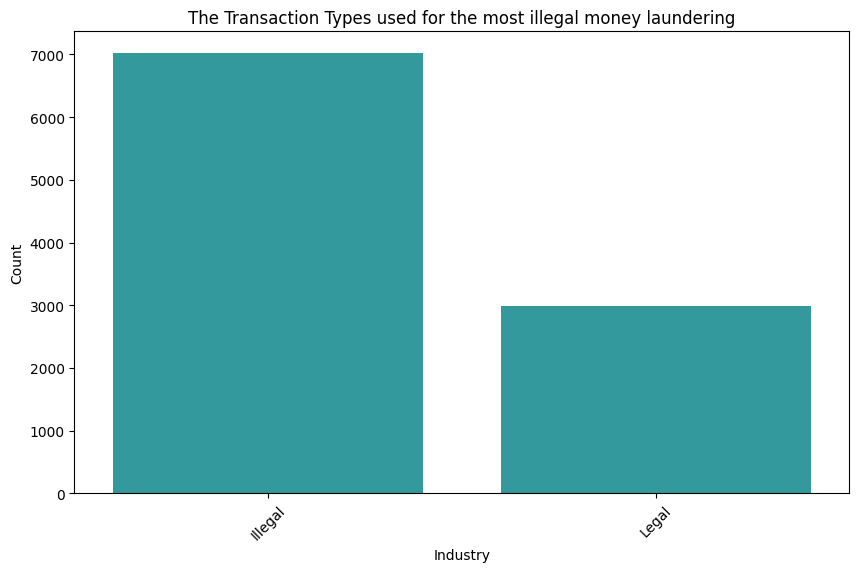

In [ ]:
country_counts = df['Source of Money'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The Transaction Types used for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

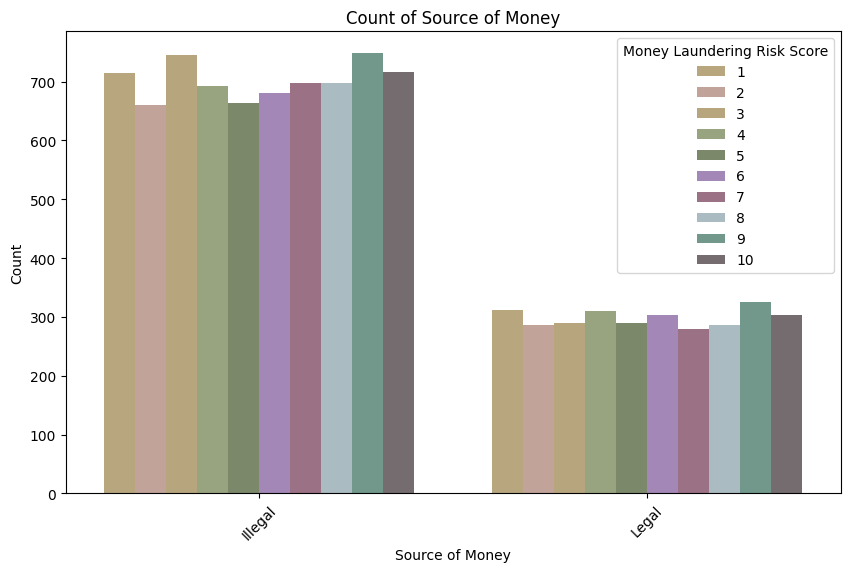

In [ ]:
# Sort the DataFrame by "Money Laundering Risk Score" for ascending hue order
df_sorted = df.sort_values(by="Money Laundering Risk Score")

# Generate moderately light colors (values between 150 and 220 for each RGB component)
hue_categories = df_sorted["Money Laundering Risk Score"].nunique()
balanced_colors = ["#%02x%02x%02x" % (random.randint(100, 200), random.randint(100, 200), random.randint(100, 200)) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted, x="Source of Money", hue="Money Laundering Risk Score", palette=balanced_colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates

# small_df = df[df['Country'] == 'China']

# plt.figure(figsize=(20, 6))
# sns.lineplot(data=small_df, x='Date of Transaction', y='Amount (USD)', hue='Destination Country')
# plt.title("Transaction Amount Over Time from China")
# plt.xlabel("Date of Transaction")
# plt.ylabel("Amount (USD)")
# plt.xticks(rotation=45)
# plt.show()

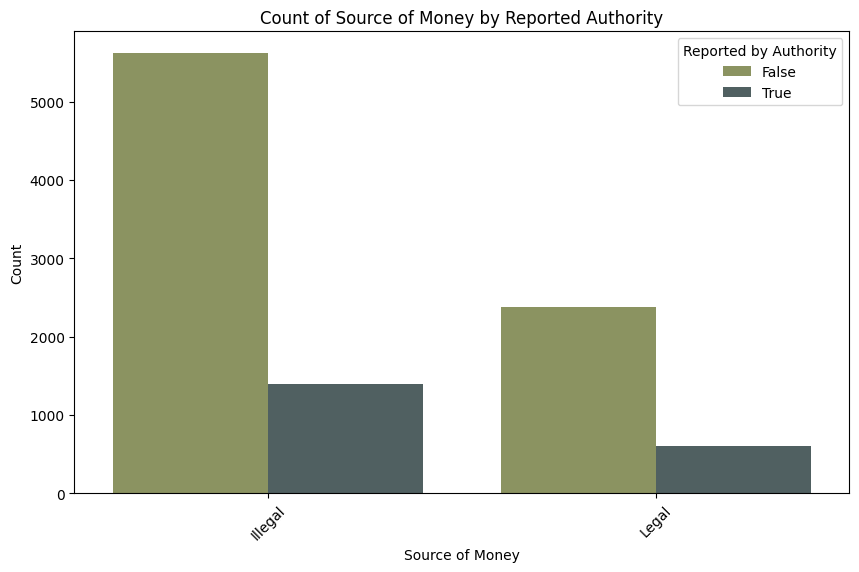

In [ ]:
# Generate random colors for each hue category
hue_categories = df["Reported by Authority"].nunique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Source of Money", hue="Reported by Authority", palette=colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money by Reported Authority")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

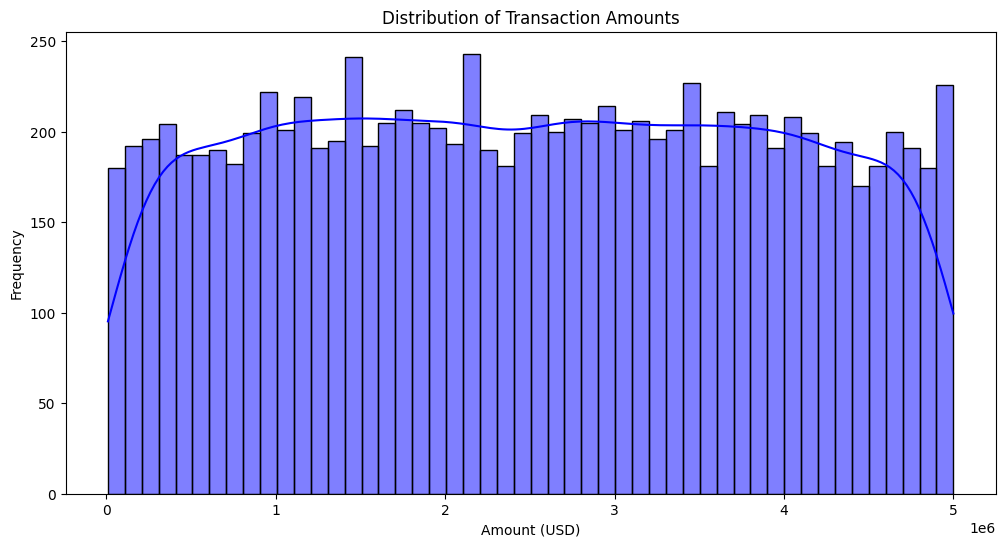

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount (USD)'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

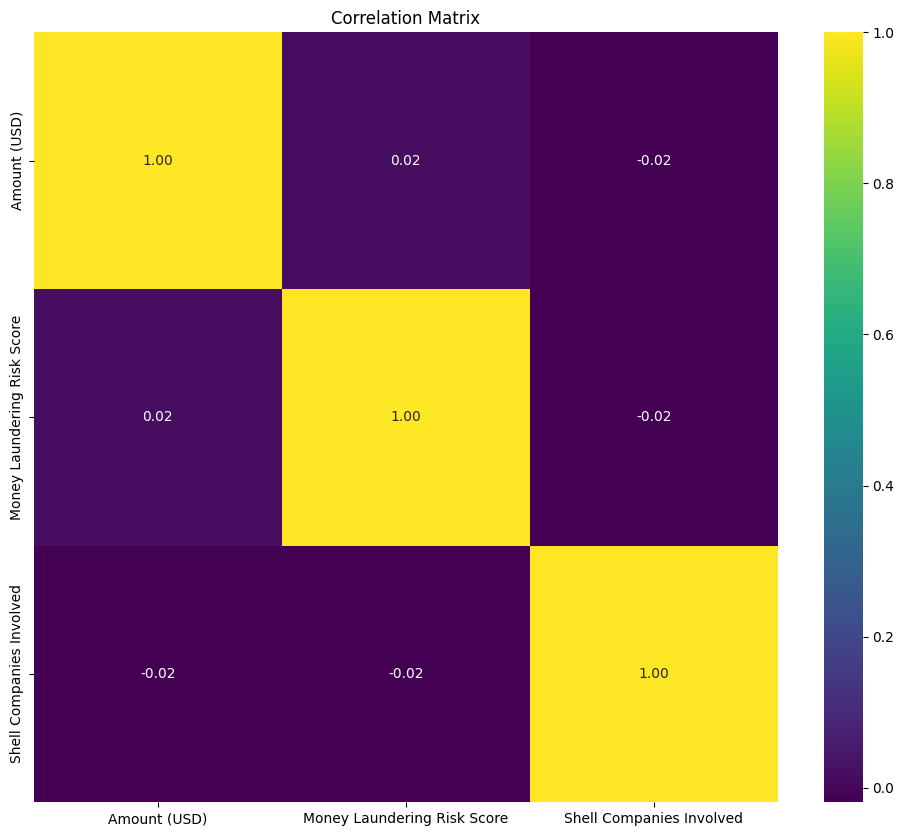

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

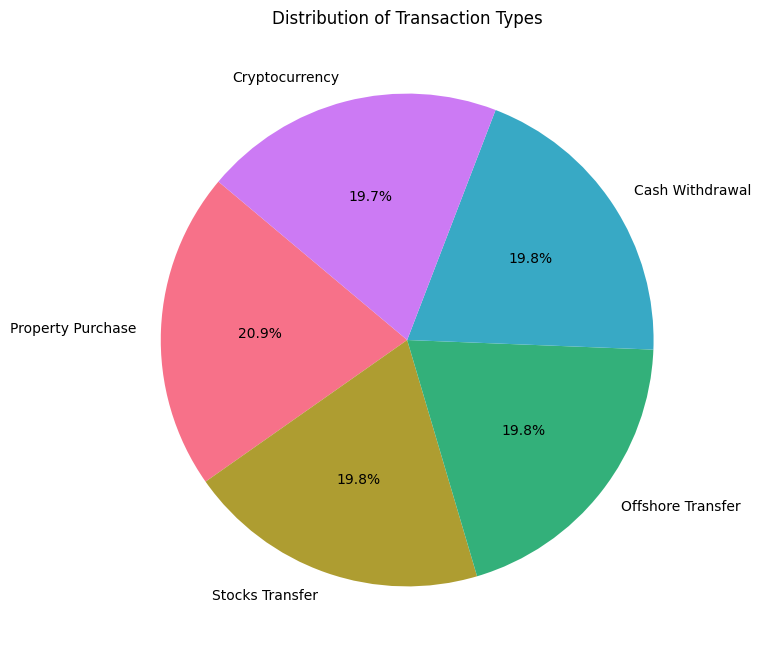

In [ ]:
plt.figure(figsize=(10, 8))
df['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df['Transaction Type'].nunique()))
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.show()

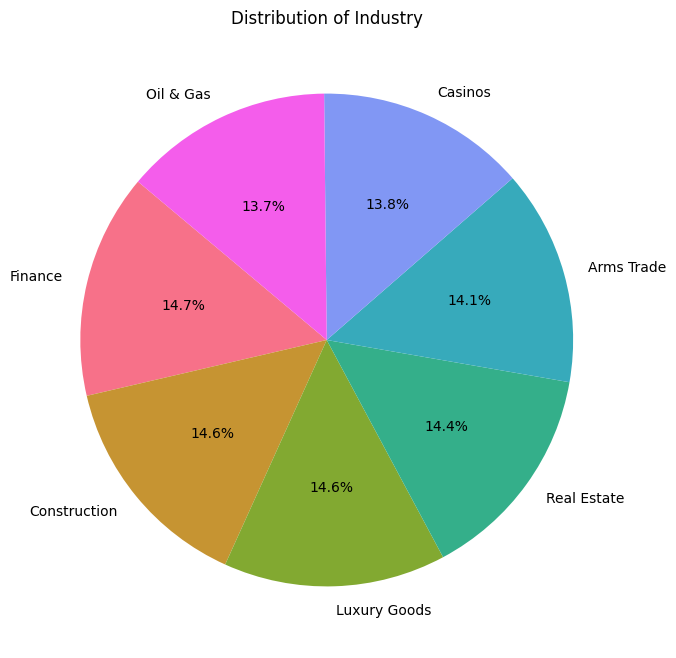

In [ ]:
plt.figure(figsize=(10, 8))
df['Industry'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df['Industry'].nunique()))
plt.title('Distribution of Industry')
plt.ylabel('')
plt.show()

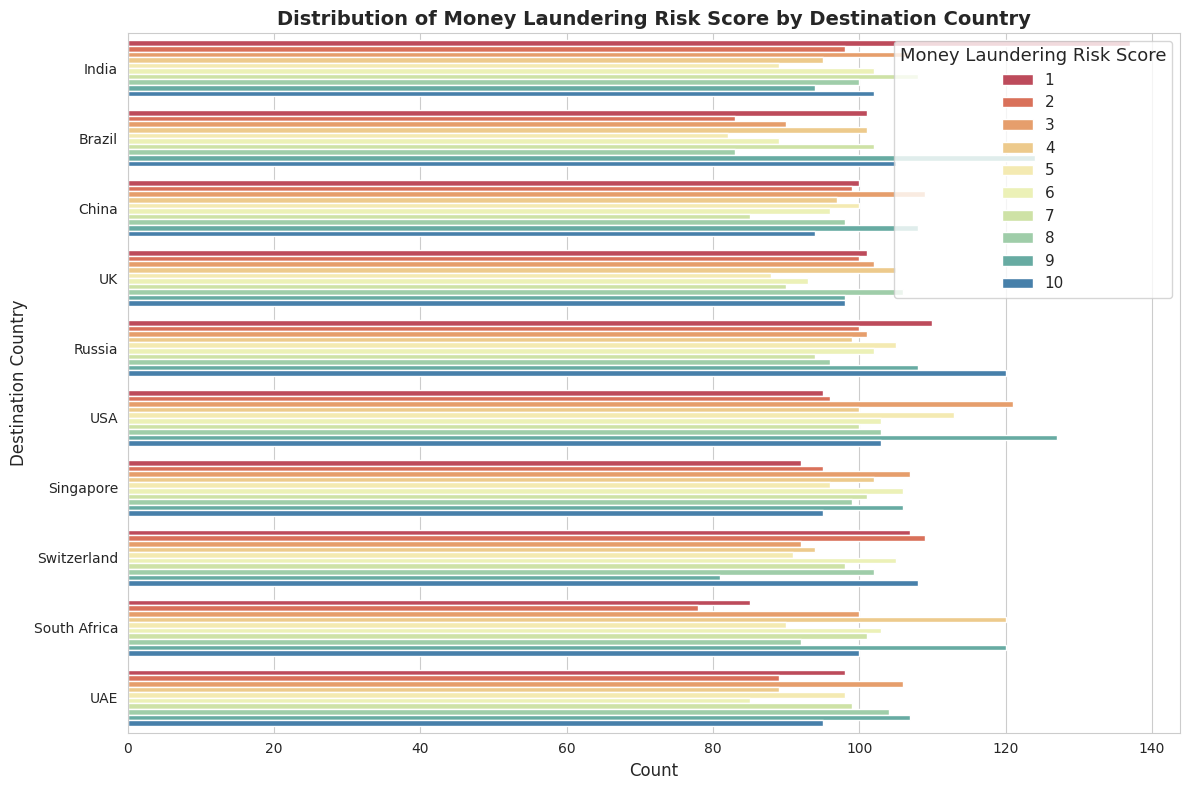

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Sort the DataFrame by "Money Laundering Risk Score" for ascending hue order
df_sorted = df.sort_values(by="Money Laundering Risk Score")

# Use a predefined color palette for a more cohesive look
palette = sns.color_palette("Spectral", df_sorted["Money Laundering Risk Score"].nunique())

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df_sorted, y="Destination Country", hue="Money Laundering Risk Score", palette=palette)
plt.title("Distribution of Money Laundering Risk Score by Destination Country", fontsize=14, weight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Destination Country", fontsize=12)

# Add a legend title
plt.legend(title="Money Laundering Risk Score", title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-26-4663925ceeaf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Destination Country", y="Money Laundering Risk Score", palette="Spectral")


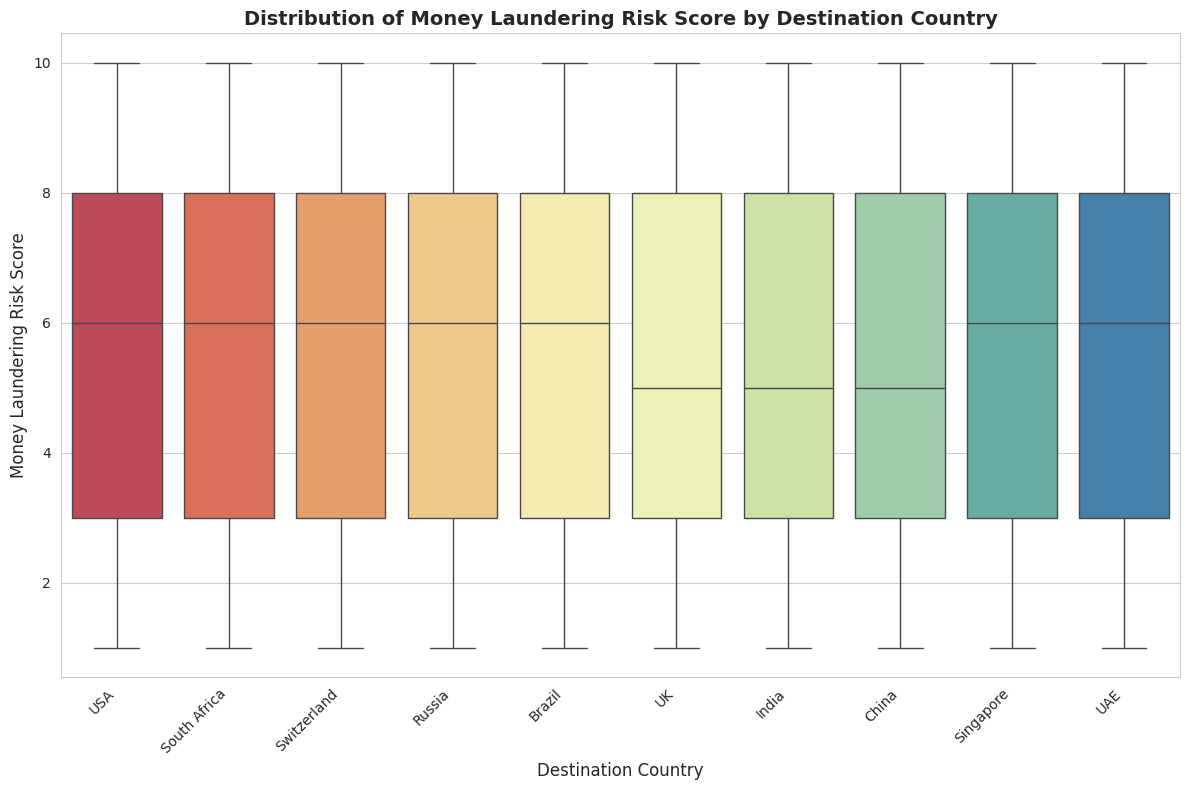

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Destination Country", y="Money Laundering Risk Score", palette="Spectral")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Money Laundering Risk Score by Destination Country", fontsize=14, weight='bold')
plt.xlabel("Destination Country", fontsize=12)
plt.ylabel("Money Laundering Risk Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


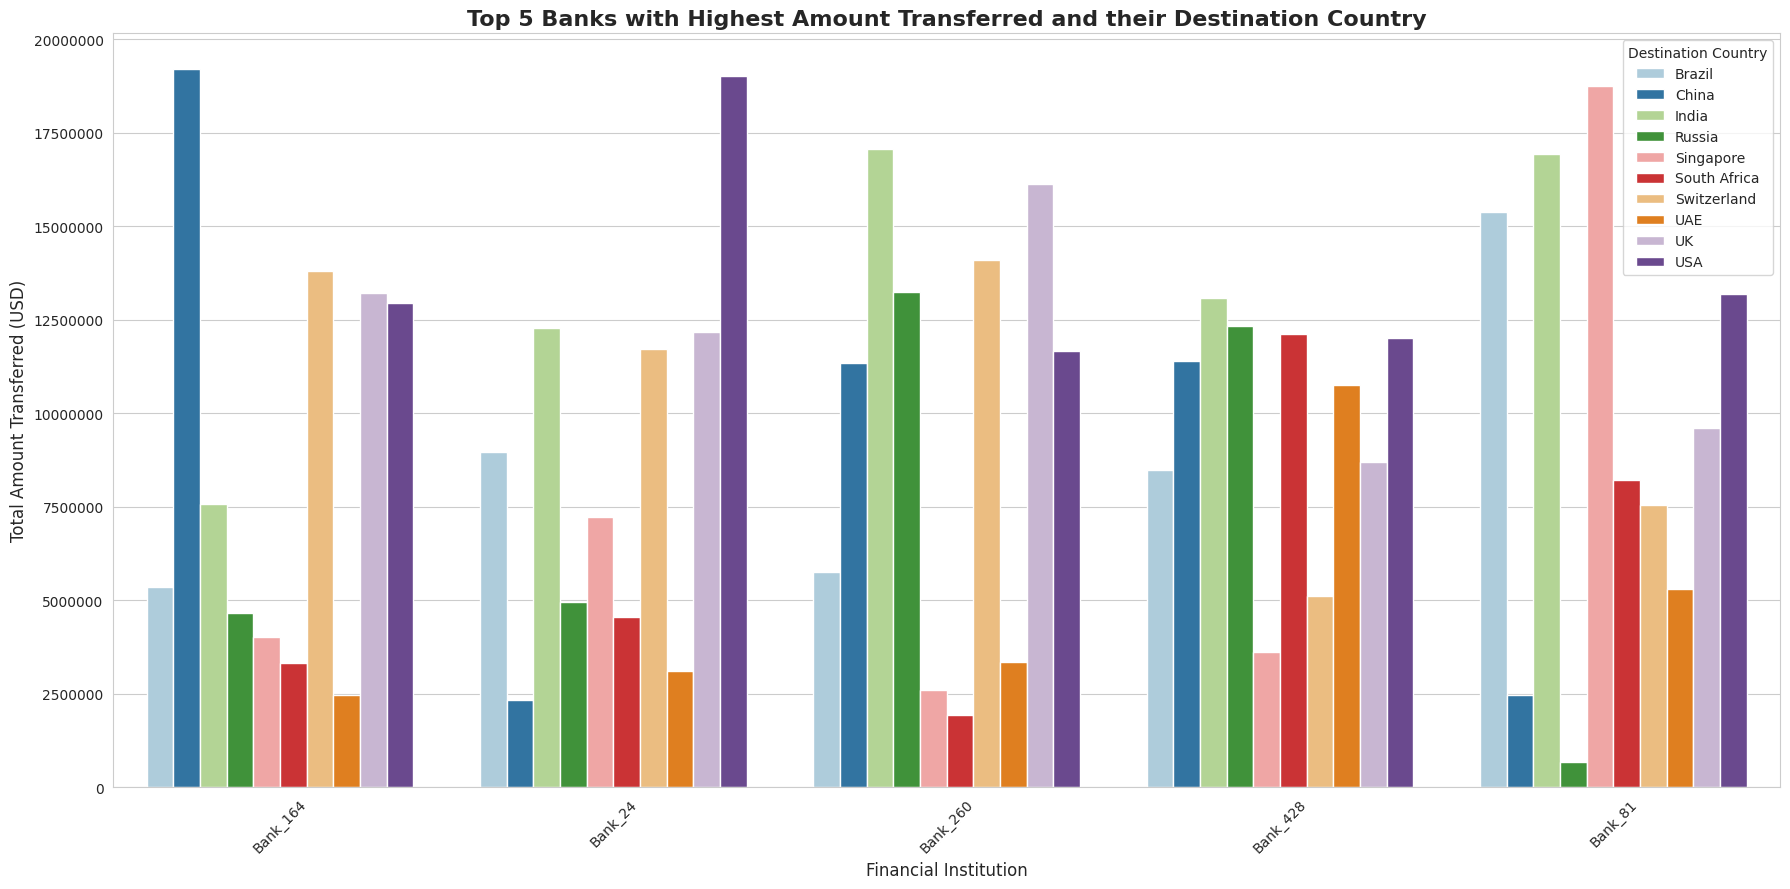

In [ ]:
# Aggregate data to get the total amount for each financial institution and destination country
total_amounts = df.groupby(['Financial Institution', 'Destination Country'])['Amount (USD)'].sum().reset_index()

# Get the top 5 financial institutions with the highest amounts
top_banks = total_amounts.groupby('Financial Institution')['Amount (USD)'].sum().nlargest(5).index

# Filter to keep only the rows for these top banks
top_banks_data = total_amounts[total_amounts['Financial Institution'].isin(top_banks)]

# Create a bar plot for the top banks and their destination countries
plt.figure(figsize=(18, 9))
sns.barplot(data=top_banks_data, x='Financial Institution', y='Amount (USD)', hue='Destination Country', palette='Paired')

# Plot aesthetics
plt.title('Top 5 Banks with Highest Amount Transferred and their Destination Country', fontsize=16, weight='bold')
plt.xlabel('Financial Institution', fontsize=12)
plt.ylabel('Total Amount Transferred (USD)', fontsize=12)
plt.xticks(rotation=45)

# Set y-axis to display without scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Destination Country')
plt.show()

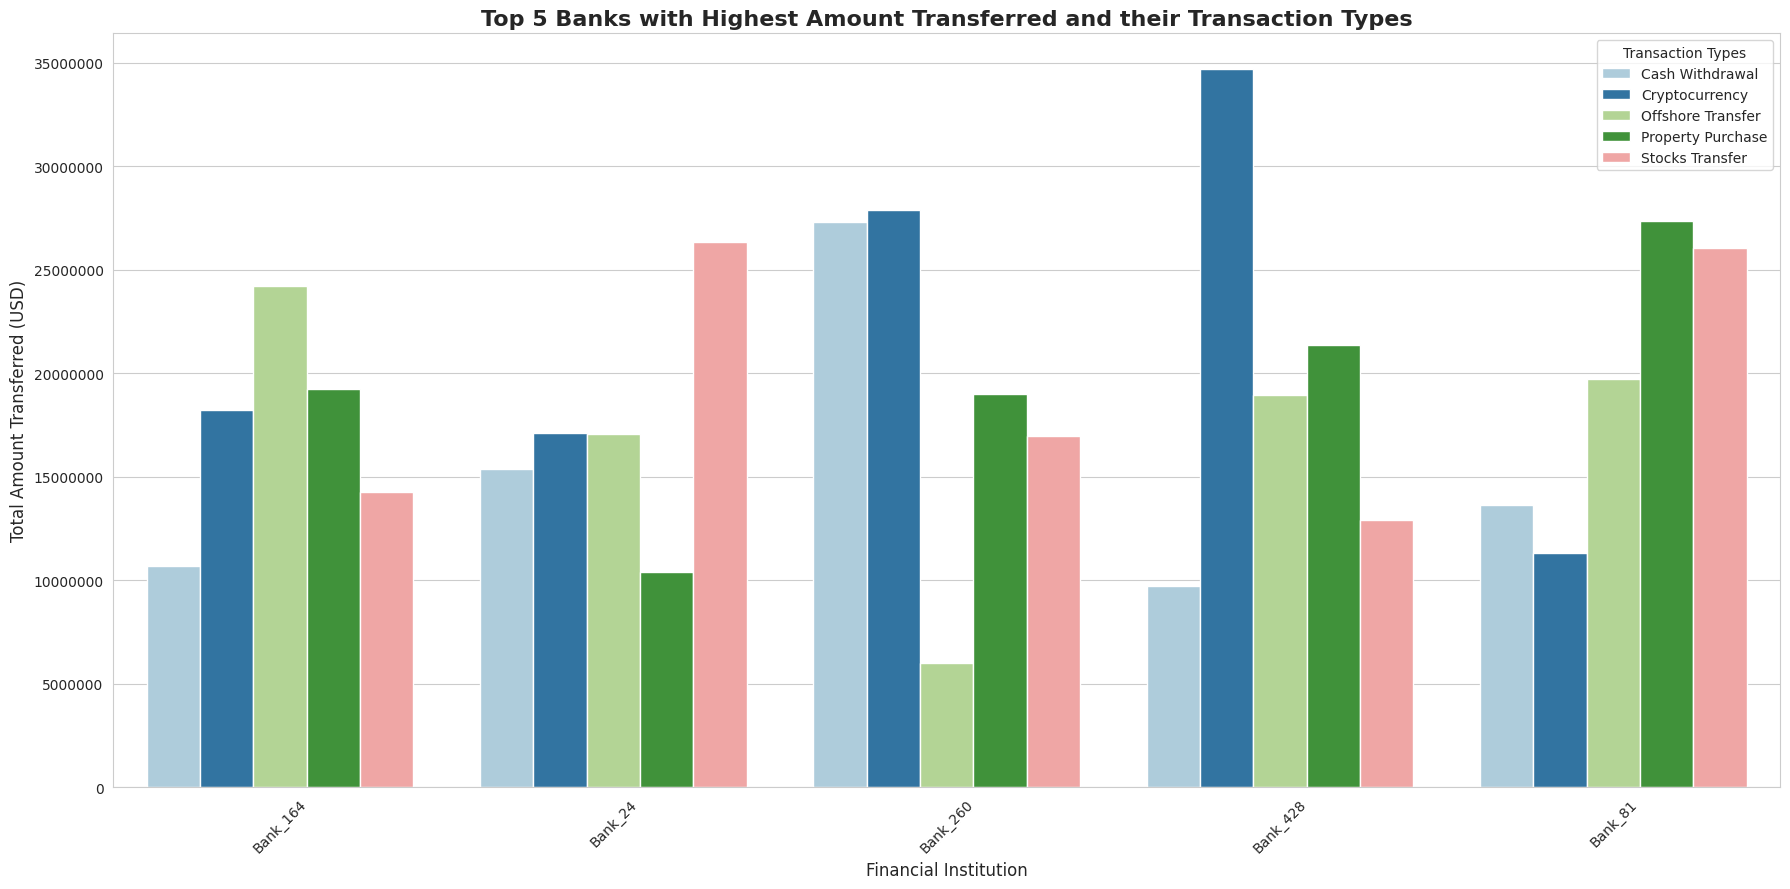

In [ ]:
# Aggregate data to get the total amount for each financial institution and destination country
total_amounts = df.groupby(['Financial Institution', 'Transaction Type'])['Amount (USD)'].sum().reset_index()

# Get the top 5 financial institutions with the highest amounts
top_banks = total_amounts.groupby('Financial Institution')['Amount (USD)'].sum().nlargest(5).index

# Filter to keep only the rows for these top banks
top_banks_data = total_amounts[total_amounts['Financial Institution'].isin(top_banks)]

# Create a bar plot for the top banks and their destination countries
plt.figure(figsize=(18, 9))
sns.barplot(data=top_banks_data, x='Financial Institution', y='Amount (USD)', hue='Transaction Type', palette='Paired')

# Plot aesthetics
plt.title('Top 5 Banks with Highest Amount Transferred and their Transaction Types', fontsize=16, weight='bold')
plt.xlabel('Financial Institution', fontsize=12)
plt.ylabel('Total Amount Transferred (USD)', fontsize=12)
plt.xticks(rotation=45)

# Set y-axis to display without scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Transaction Types')
plt.show()

<ipython-input-29-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-29-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-29-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-29-2ea193290dda>:23: FutureWarning: 

Passing `palet

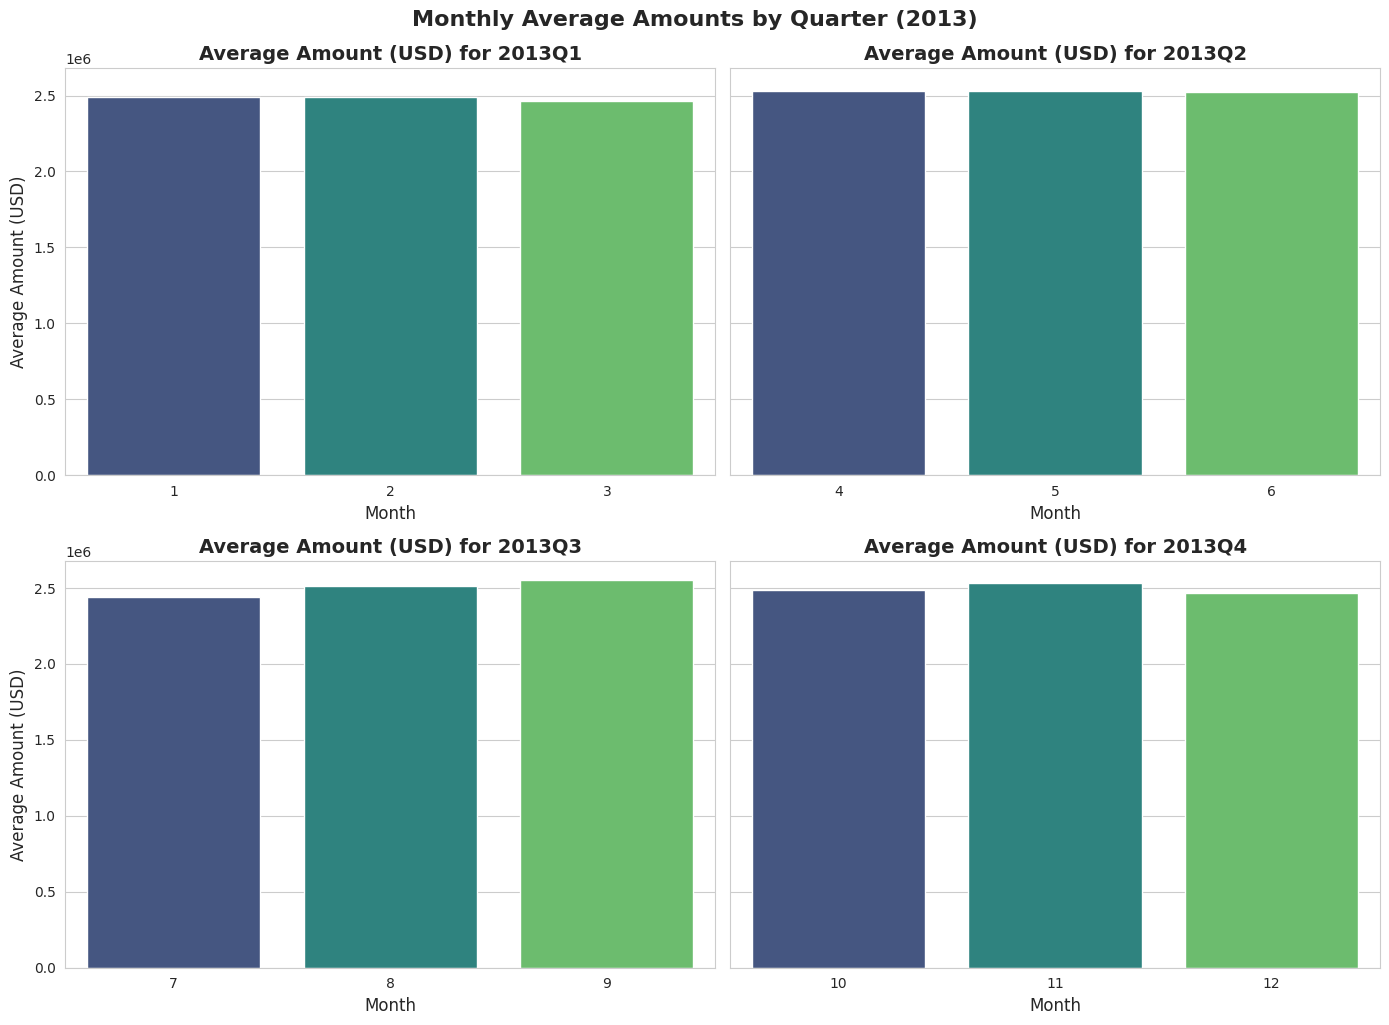

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month and quarter
df['Month'] = df['Date of Transaction'].dt.month
df['Quarter'] = df['Date of Transaction'].dt.to_period('Q')

# Create a figure with subplots for each quarter
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()  # Flatten to easily access each subplot

# Define quarters for labeling
quarters = ['2013Q1', '2013Q2', '2013Q3', '2013Q4']

for i, quarter in enumerate(quarters):
    # Filter data for each quarter
    quarter_data = df[df['Quarter'] == quarter]

    # Calculate monthly averages for each month in the quarter
    monthly_avg = quarter_data.groupby(['Month'])['Amount (USD)'].mean().reset_index()

    # Create the plot for the quarter
    sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')

    # Plot aesthetics
    axes[i].set_title(f'Average Amount (USD) for {quarter}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Month', fontsize=12)
    axes[i].set_ylabel('Average Amount (USD)', fontsize=12)
    # axes[i].set_xticks(range(1, 13))  # Set x-ticks to represent months
    # axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    # axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle('Monthly Average Amounts by Quarter (2013)', fontsize=16, weight='bold', y=1.02)
plt.show()

<ipython-input-30-528dc13e2ab4>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')


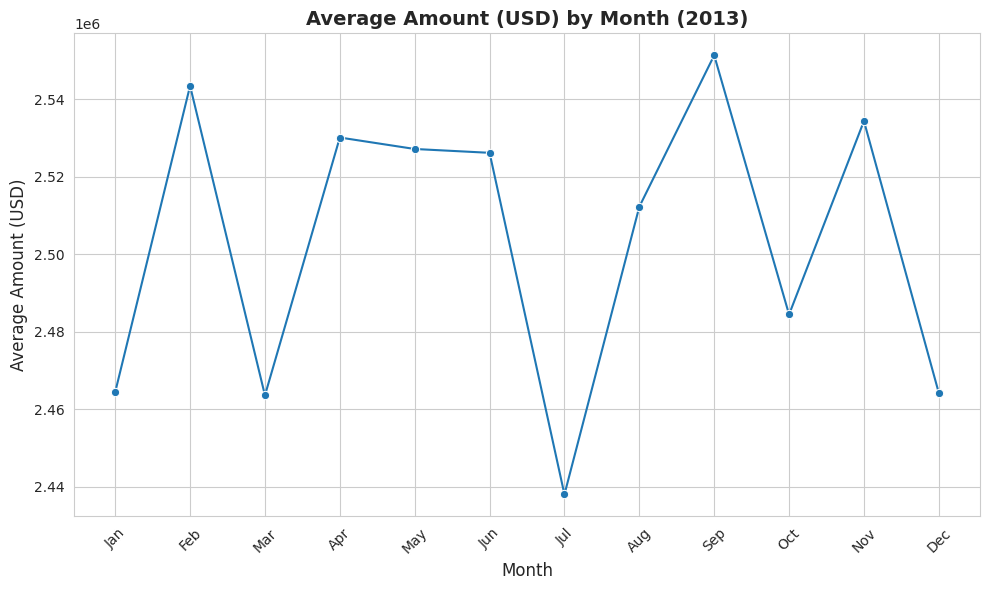

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages
monthly_avg = df.groupby(['Month'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

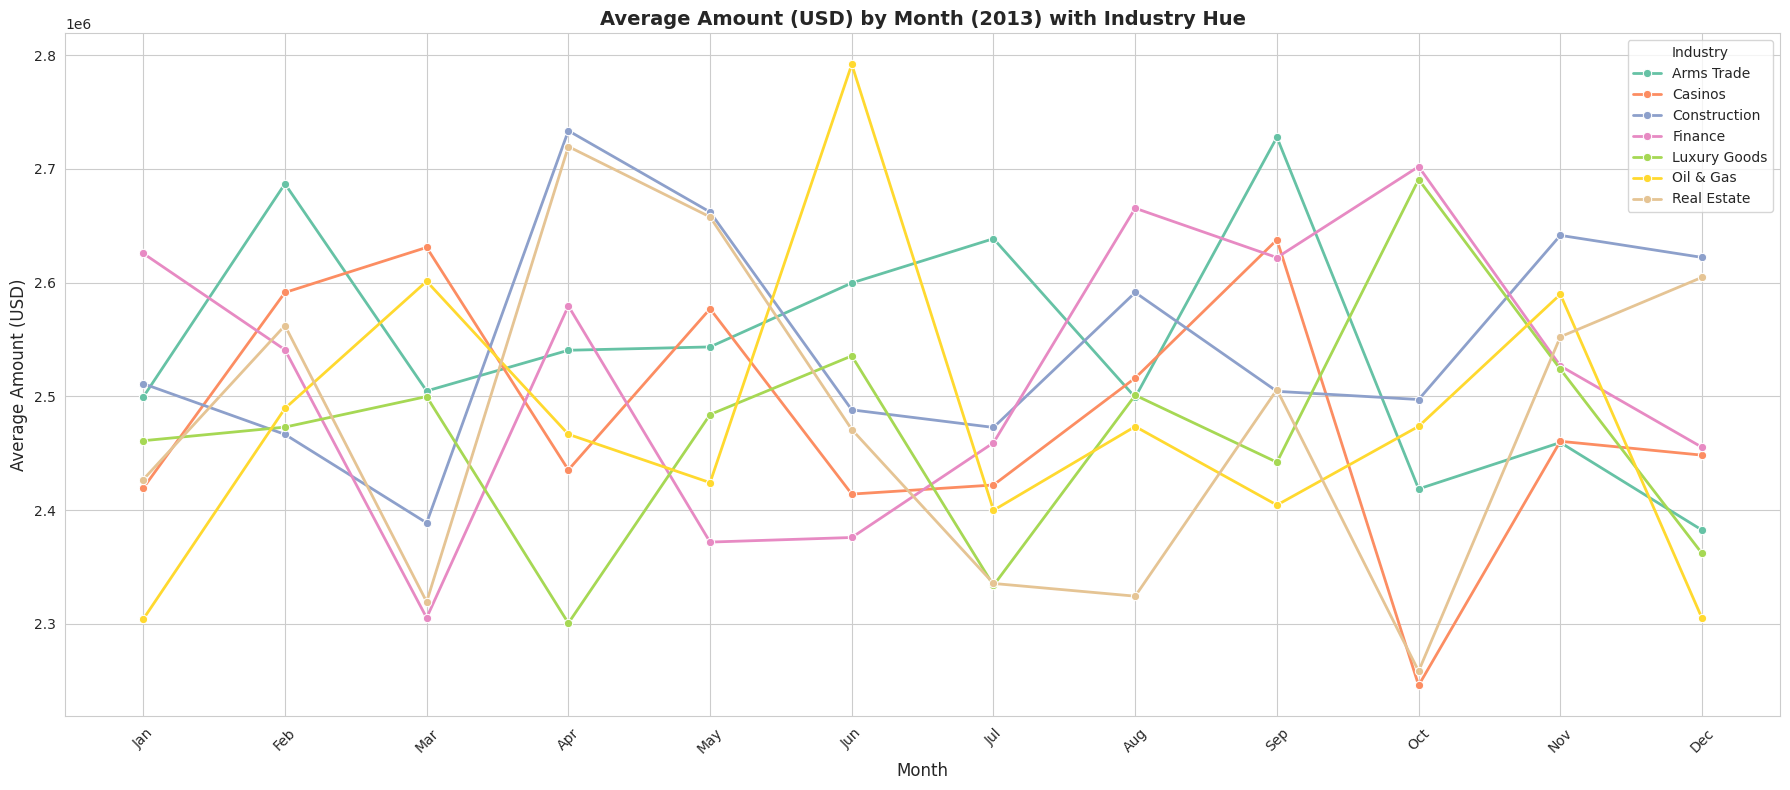

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Industry'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Industry', palette='Set2', linewidth=2)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Industry Hue', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

In [ ]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country', 'Month', 'Quarter'],
      dtype='object')

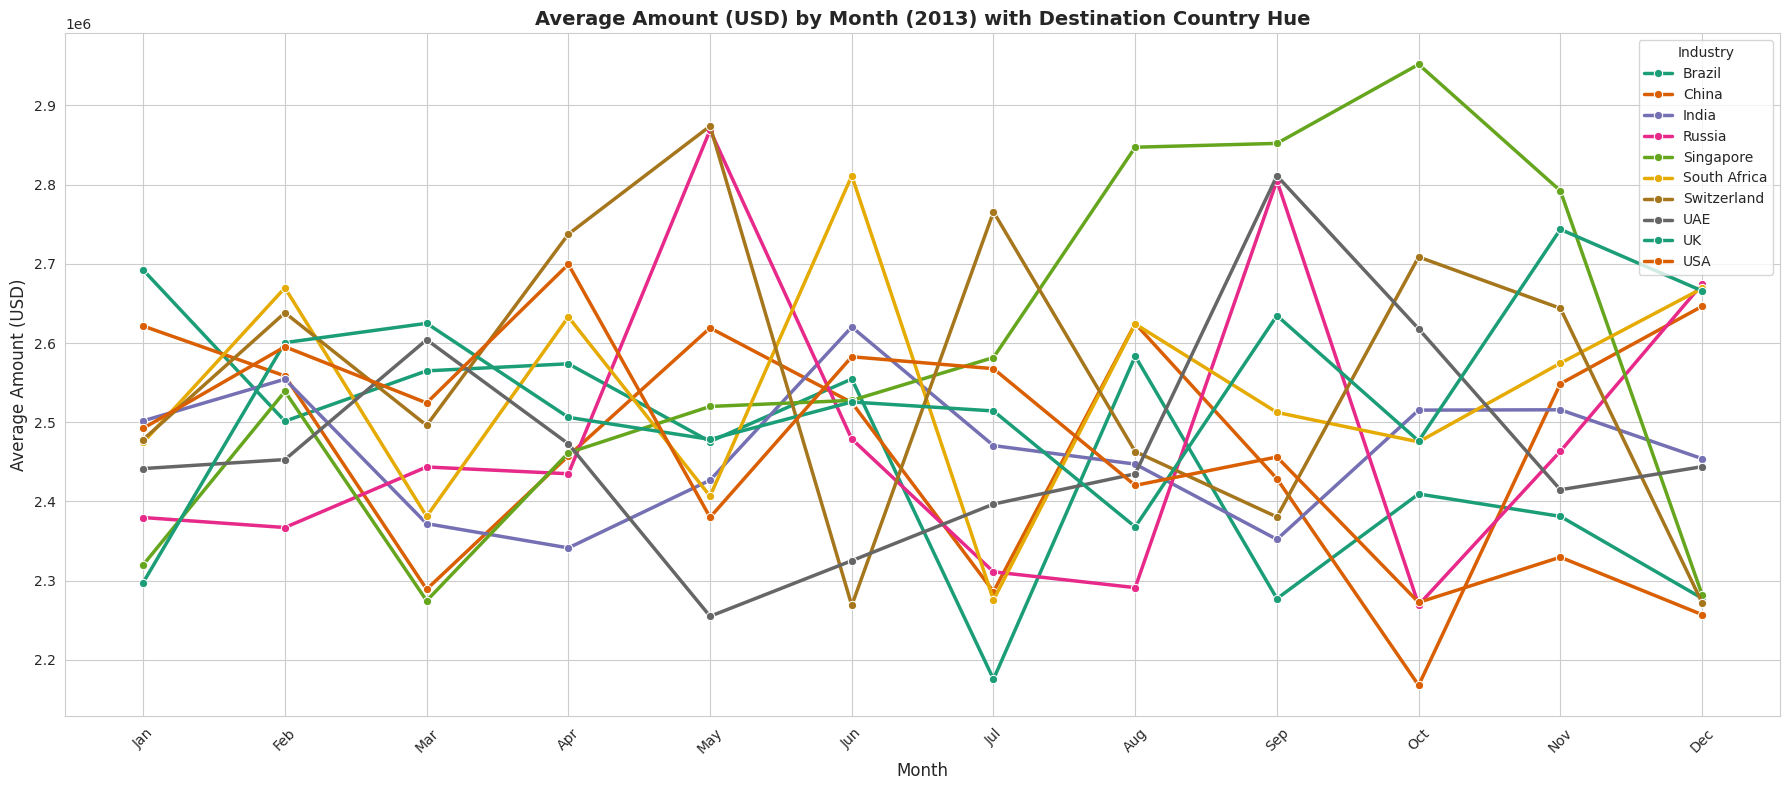

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Destination Country'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Destination Country', palette='Dark2', linewidth=2.5)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Destination Country Hue', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

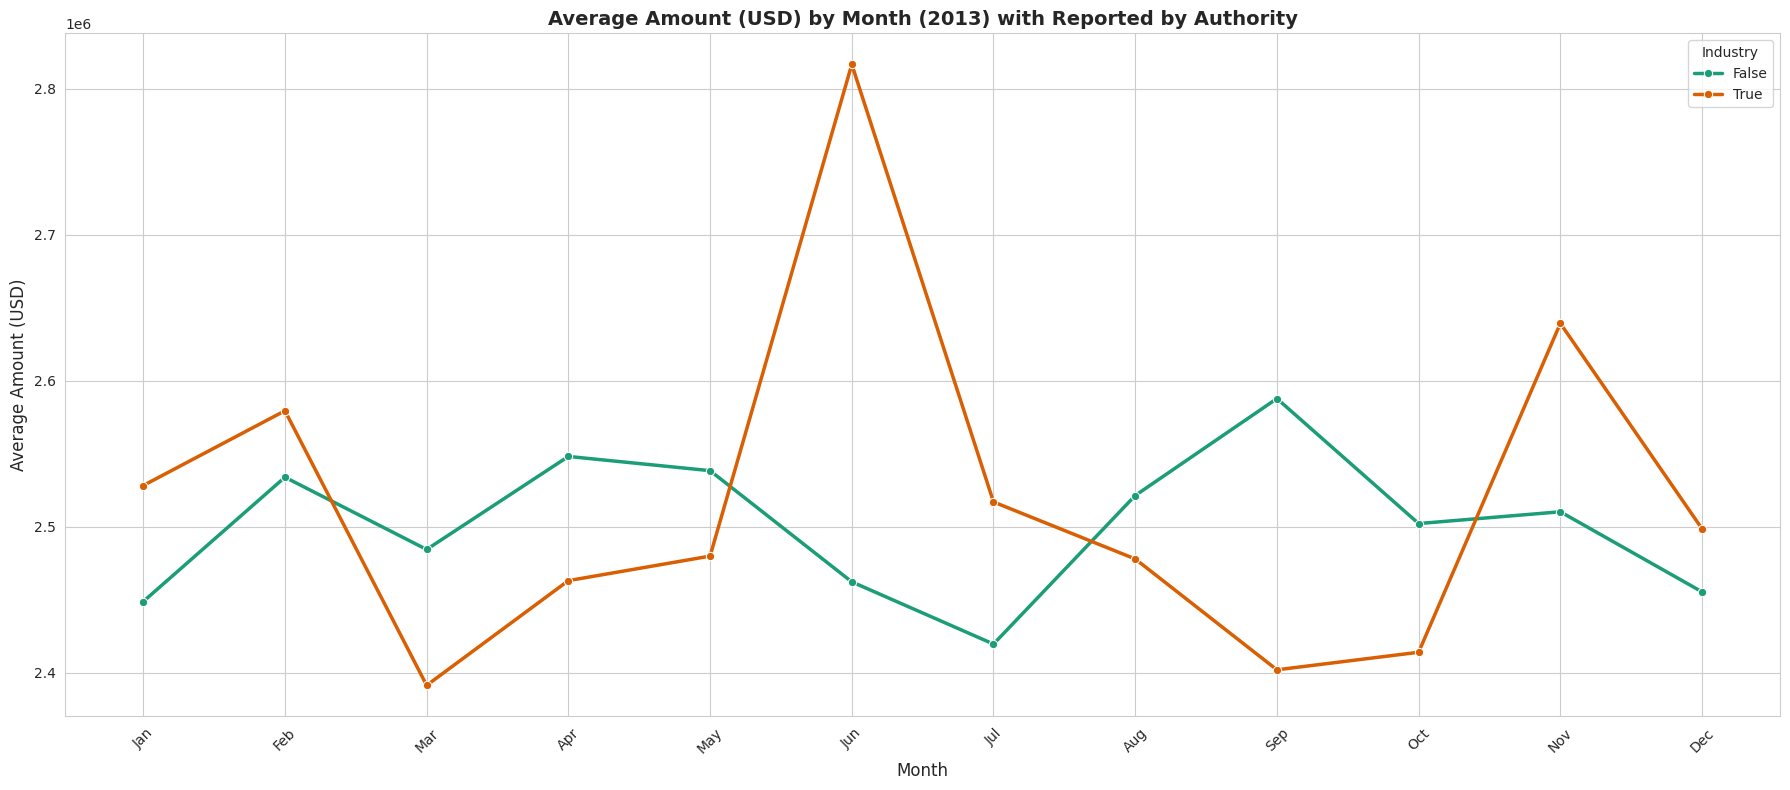

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Reported by Authority'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Reported by Authority', palette='Dark2', linewidth=2.5)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Reported by Authority', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

<ipython-input-35-a17ea7d3d83d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')


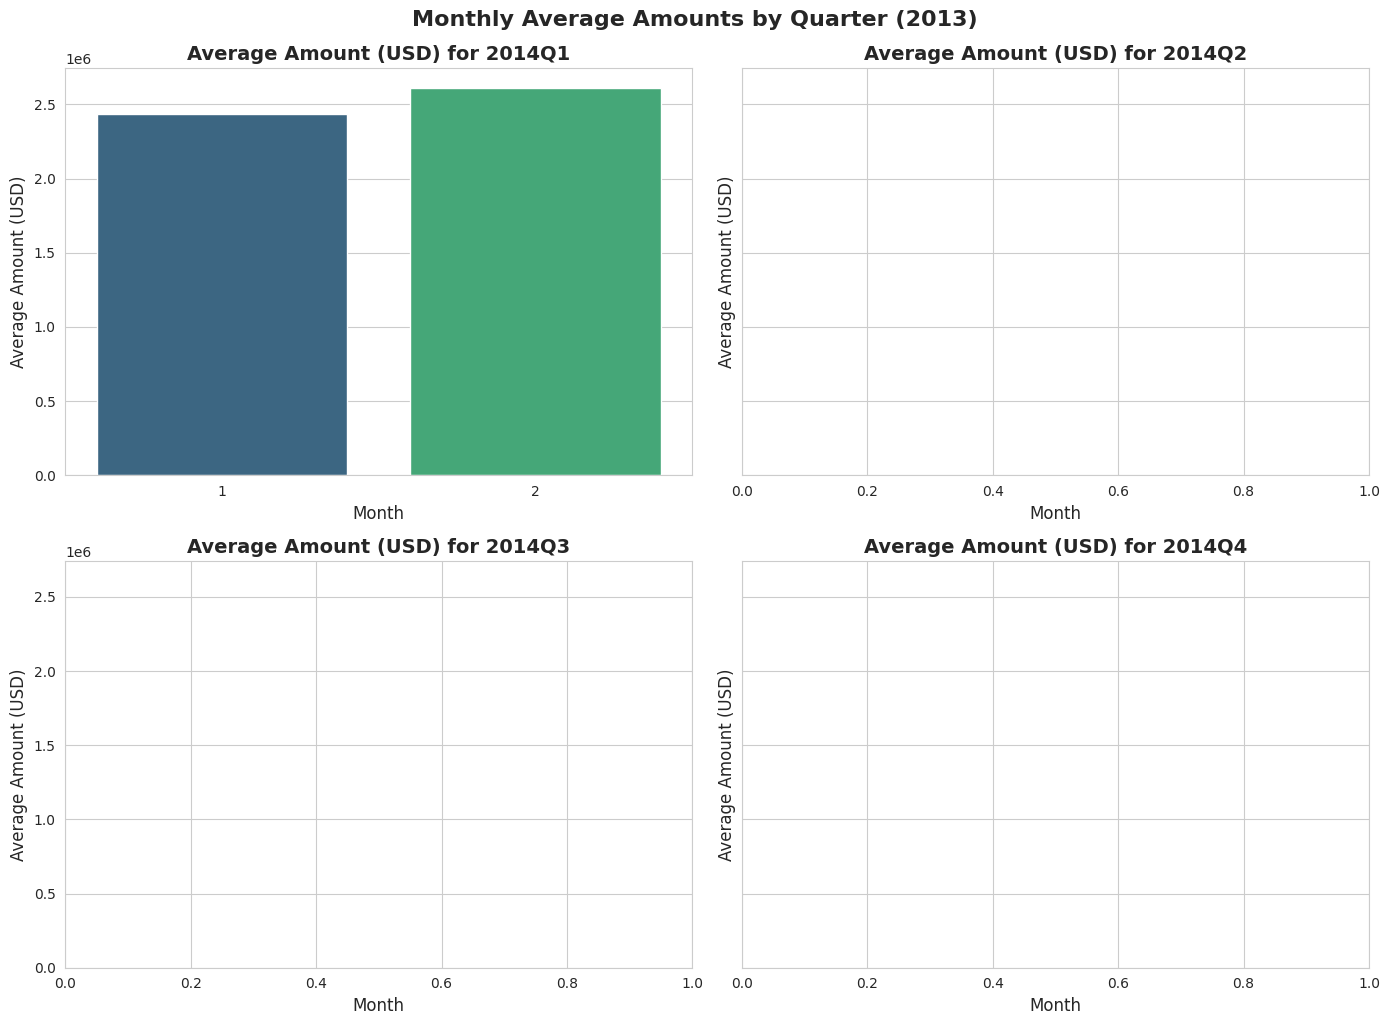

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month and quarter
df['Month'] = df['Date of Transaction'].dt.month
df['Quarter'] = df['Date of Transaction'].dt.to_period('Q')

# Create a figure with subplots for each quarter
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()  # Flatten to easily access each subplot

# Define quarters for labeling
quarters = ['2014Q1', '2014Q2', '2014Q3', '2014Q4']

for i, quarter in enumerate(quarters):
    # Filter data for each quarter
    quarter_data = df[df['Quarter'] == quarter]

    # Calculate monthly averages for each month in the quarter
    monthly_avg = quarter_data.groupby(['Month'])['Amount (USD)'].mean().reset_index()

    # Create the plot for the quarter
    sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')

    # Plot aesthetics
    axes[i].set_title(f'Average Amount (USD) for {quarter}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Month', fontsize=12)
    axes[i].set_ylabel('Average Amount (USD)', fontsize=12)
    # axes[i].set_xticks(range(1, 13))  # Set x-ticks to represent months
    # axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    # axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle('Monthly Average Amounts by Quarter (2013)', fontsize=16, weight='bold', y=1.02)
plt.show()

<ipython-input-36-3ac97bf31f19>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Month'] = df_2014['Date of Transaction'].dt.month
<ipython-input-36-3ac97bf31f19>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')


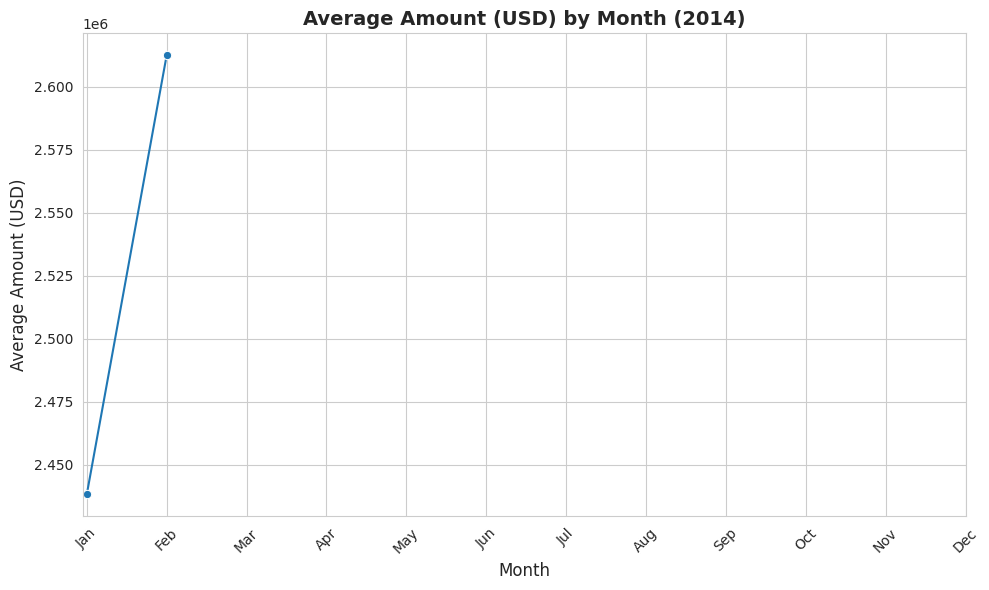

In [ ]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Filter the DataFrame for transactions in 2014
df_2014 = df[df['Date of Transaction'].dt.year == 2014]

# Add a column for the month
df_2014['Month'] = df_2014['Date of Transaction'].dt.month

# Calculate monthly averages
monthly_avg = df_2014.groupby(['Month'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages for 2014
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2014)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<ipython-input-37-9db168517fd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Month'] = df_2014['Date of Transaction'].dt.month


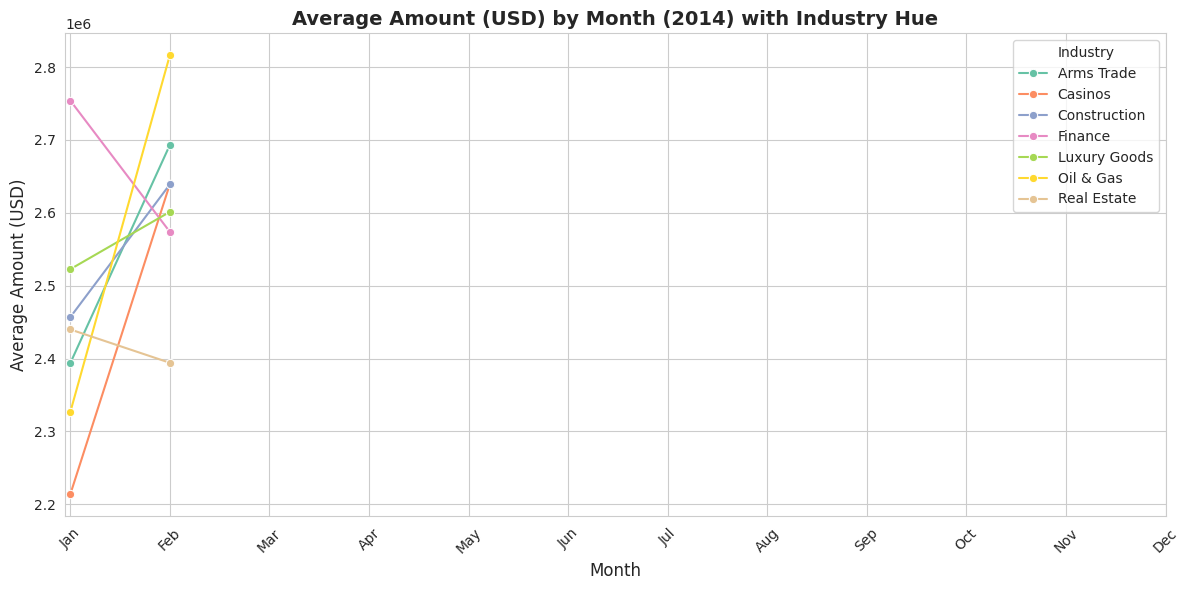

In [ ]:
# Add a column for the month
df_2014['Month'] = df_2014['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df_2014.groupby(['Month', 'Industry'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Industry', palette='Set2')

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2014) with Industry Hue', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()